In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import scipy as sp
import findspark
import os
findspark.init(os.environ['SPARK_HOME'])
from pyspark.sql import *
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

%matplotlib inline

spark = SparkSession.builder.getOrCreate()

In [2]:
dataframe = pd.read_csv('../data/processed/clean_food_and_cities.csv')

# Distribution of the products per nutrition grade

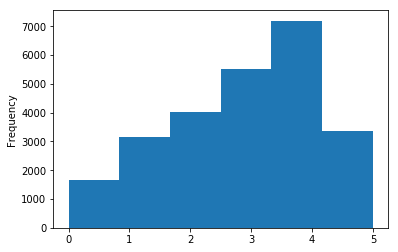

In [3]:
# we plot the general distribution of the nutrition grade for all remaining products
dataframe['nutrition_grade_numeric'].plot.hist(bins=6)

We see that most of the products are labeled with a `3` or below, which indicates that healthy products are rare in comparison. 

Reminder: `0` is equivalent to no data.

# Correlation between income and "quality" of the available products

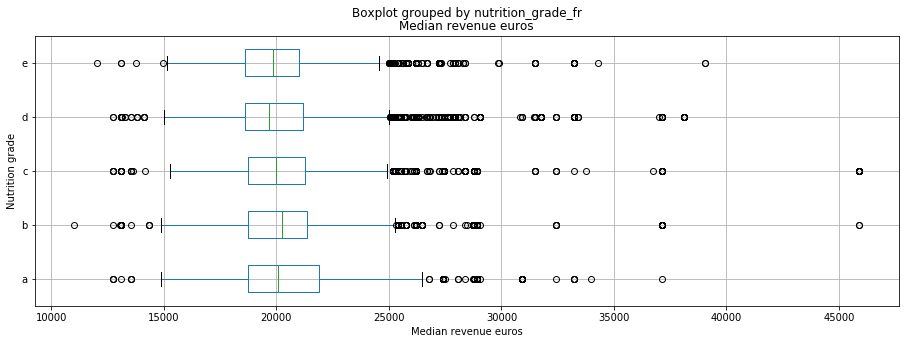

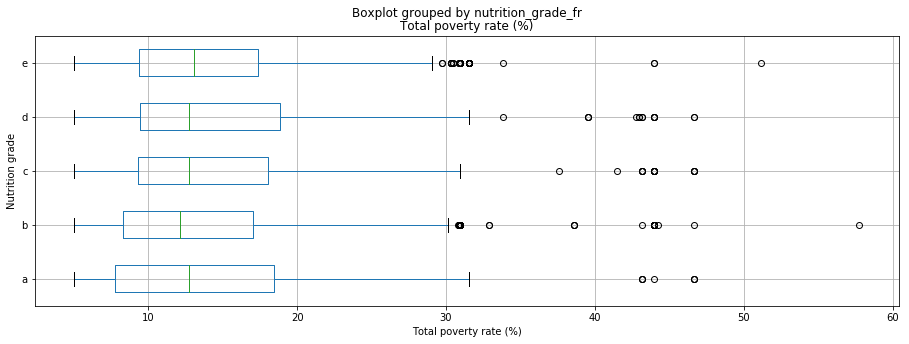

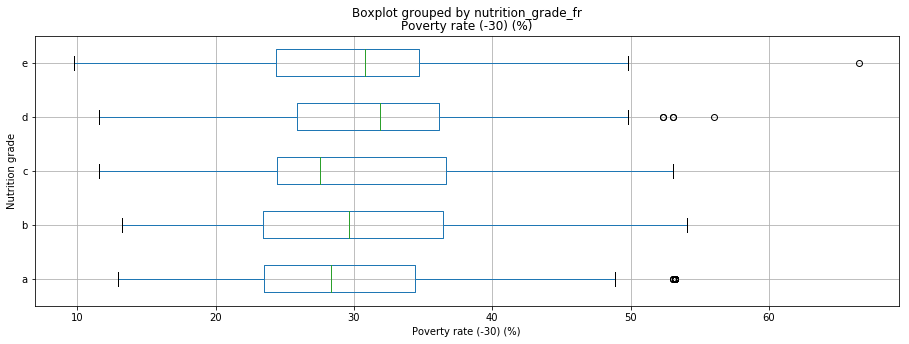

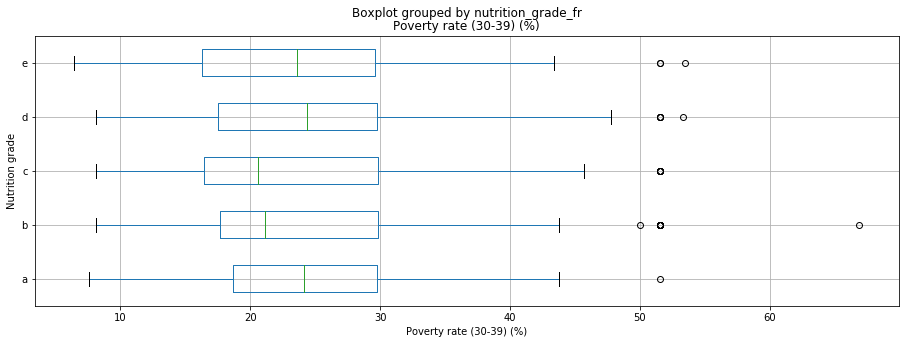

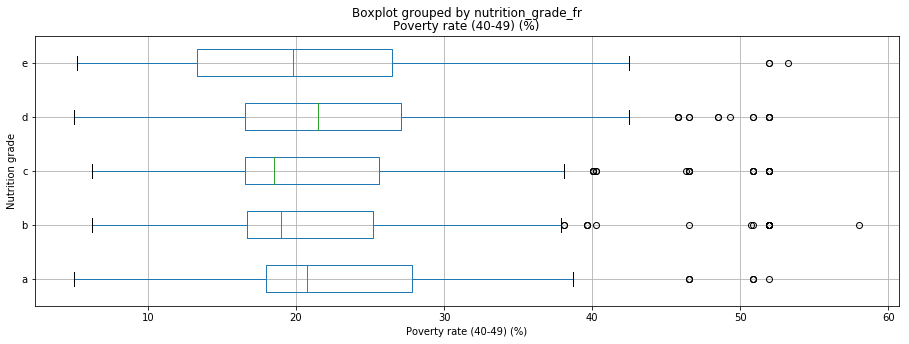

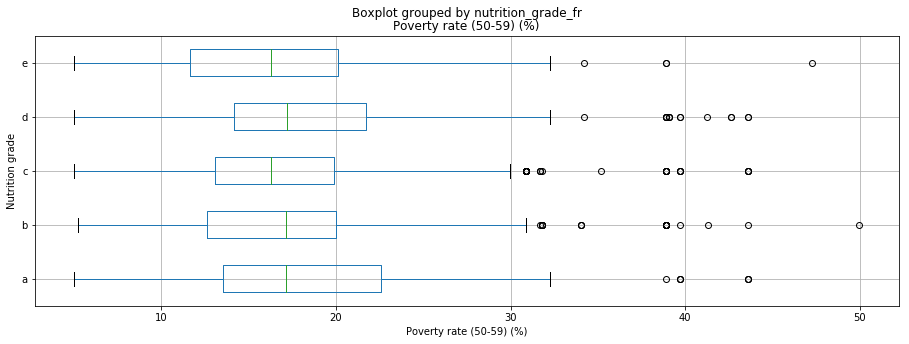

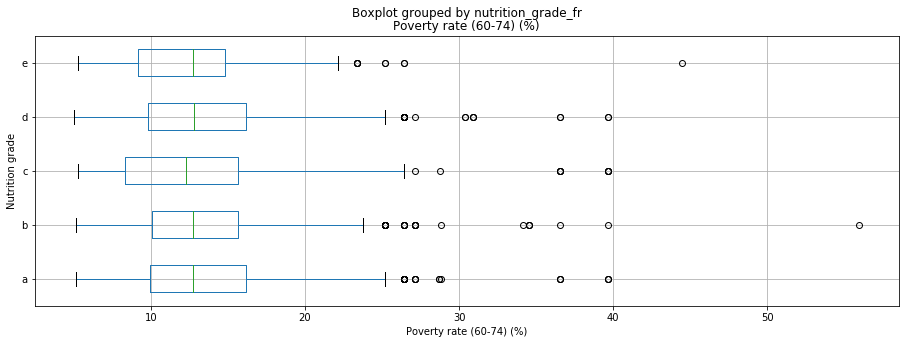

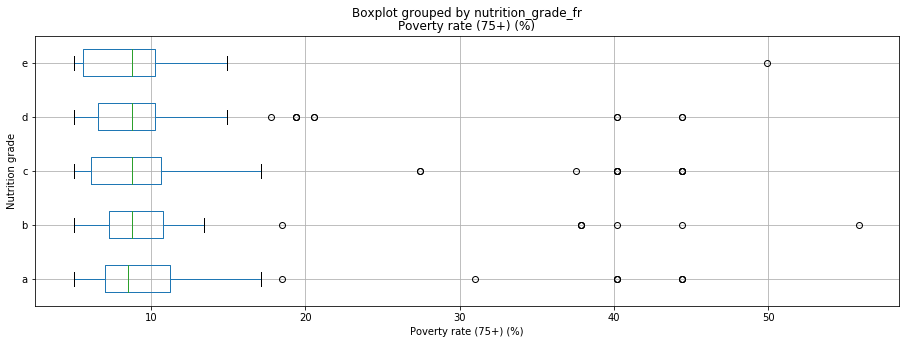

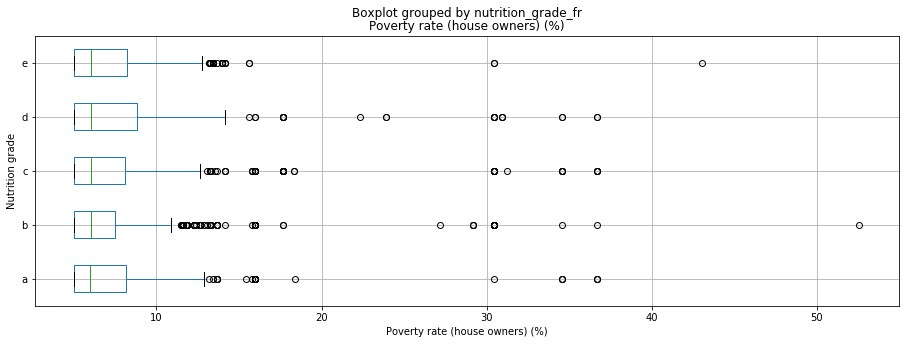

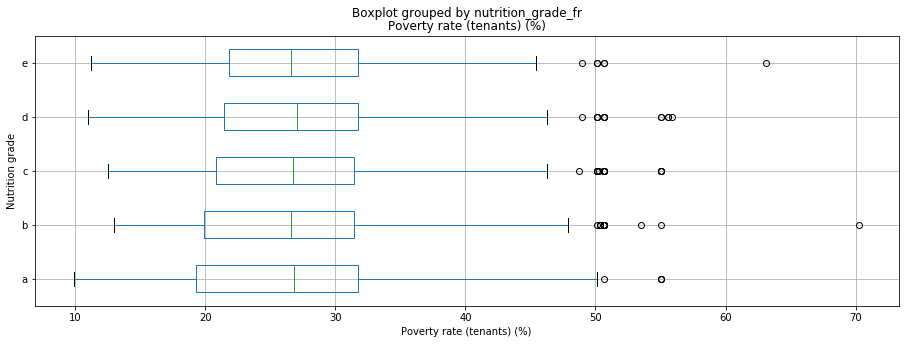

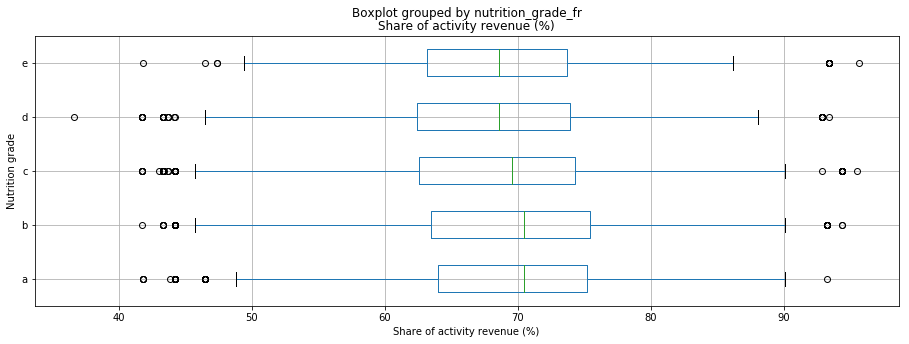

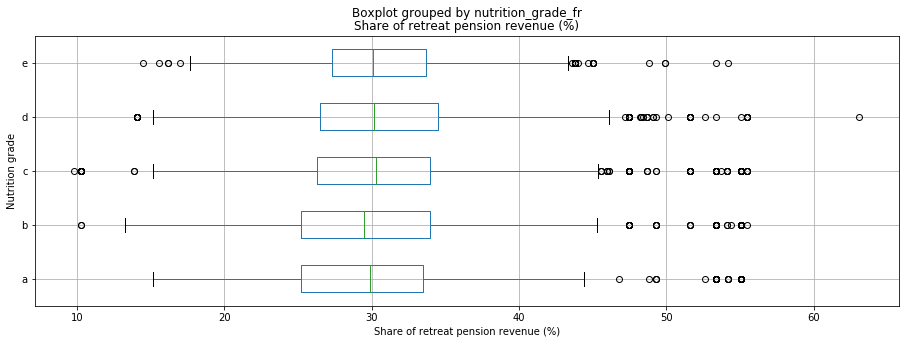

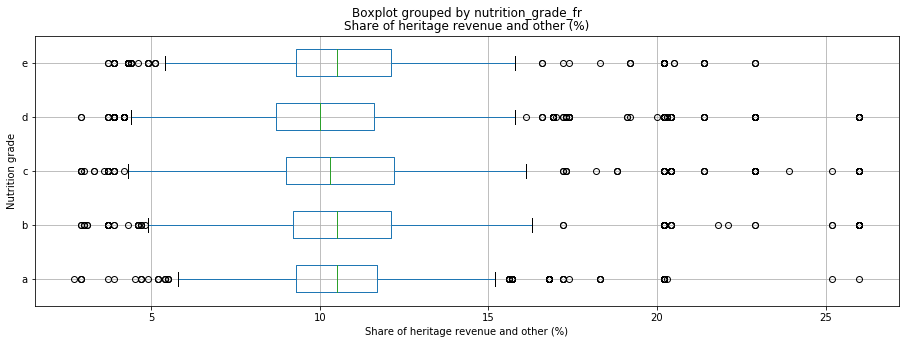

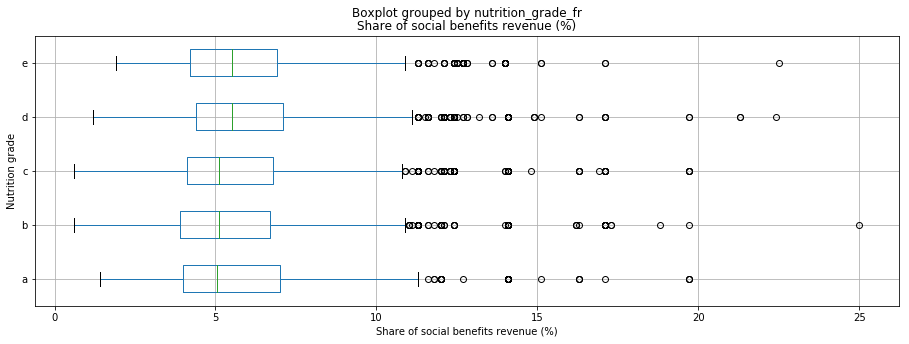

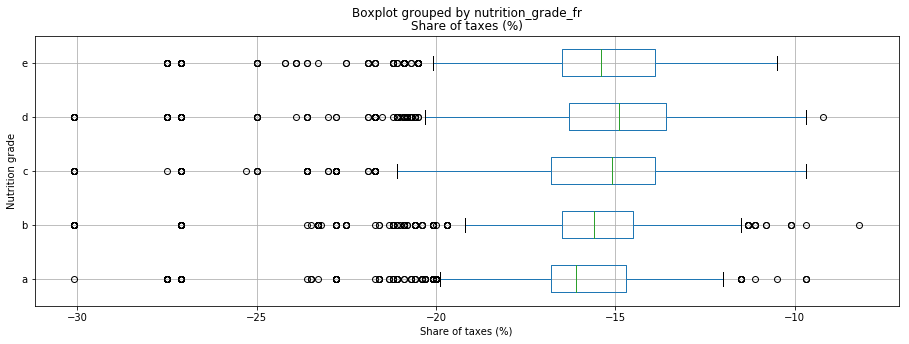

In [4]:
for column in ['Median revenue euros', 'Total poverty rate (%)',
       'Poverty rate (-30) (%)', 'Poverty rate (30-39) (%)',
       'Poverty rate (40-49) (%)', 'Poverty rate (50-59) (%)',
       'Poverty rate (60-74) (%)', 'Poverty rate (75+) (%)',
       'Poverty rate (house owners) (%)', 'Poverty rate (tenants) (%)',
       'Share of activity revenue (%)', 'Share of retreat pension revenue (%)',
       'Share of heritage revenue and other (%)',
       'Share of social benefits revenue (%)', 'Share of taxes (%)'
              ]:
    dataframe.boxplot(column=column, 
                  by='nutrition_grade_fr', 
                  vert=False, figsize=(15, 5)
                 )
    plt.xlabel(column)#"Mean income of the purchase town (in €)")
    plt.ylabel("Nutrition grade")
    #plt.title("Distribution of the sold food items with regard to the median income of the purchase town.")
    plt.show()

In [5]:
dataframe.columns

Index(['Unnamed: 0', 'city_index', 'food_item_index',
       'city_tag_from_food_item', 'code', 'nutrition_grade_fr', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'proteins_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'City name', 'Household inhabitants',
       'Median revenue euros', 'Total poverty rate (%)',
       'Poverty rate (-30) (%)', 'Poverty rate (30-39) (%)',
       'Poverty rate (40-49) (%)', 'Poverty rate (50-59) (%)',
       'Poverty rate (60-74) (%)', 'Poverty rate (75+) (%)',
       'Poverty rate (house owners) (%)', 'Poverty rate (tenants) (%)',
       'Share of activity revenue (%)', 'Share of retreat pension revenue (%)',
       'Share of heritage revenue and other (%)',
       'Share of social benefits revenue (%)', 'Share of taxes (%)',
       'nutrition_grade_numeric'],
      dtype='object')

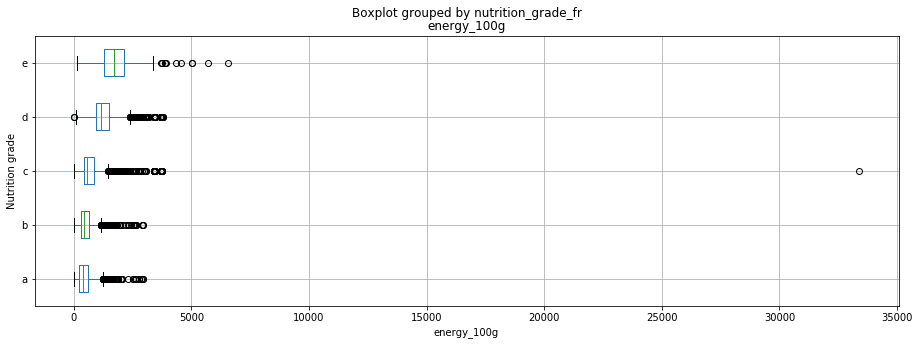

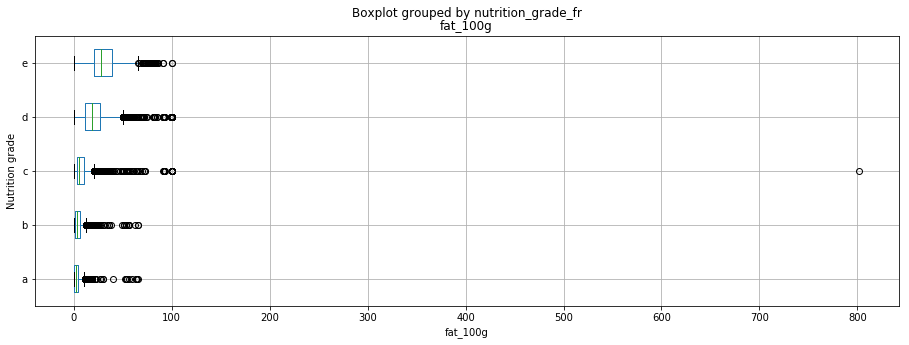

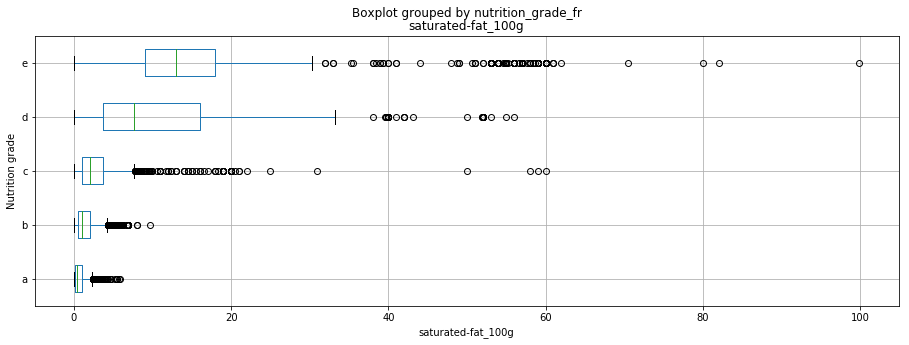

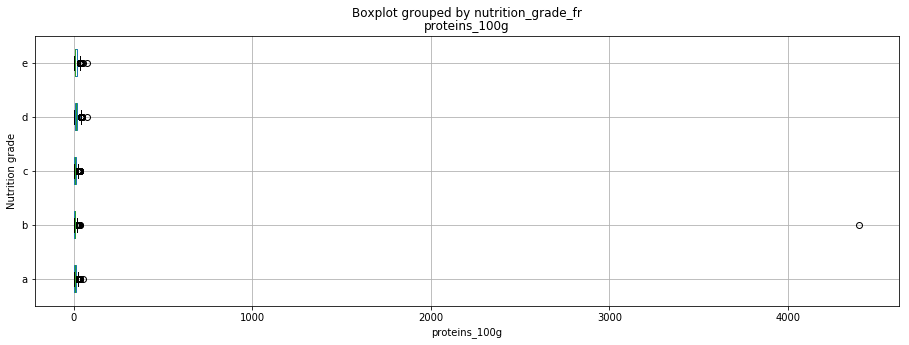

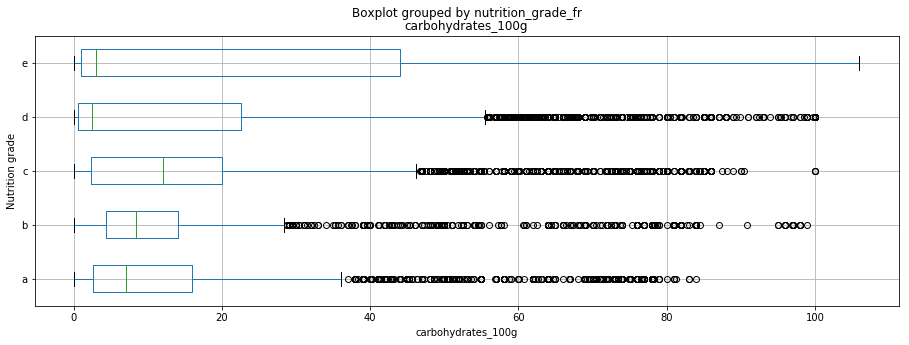

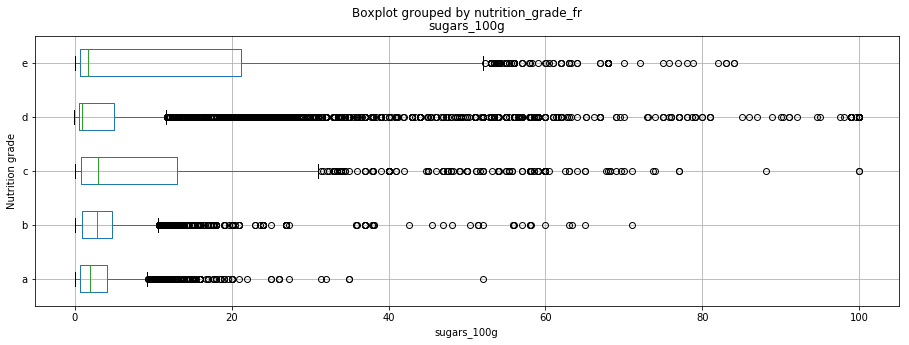

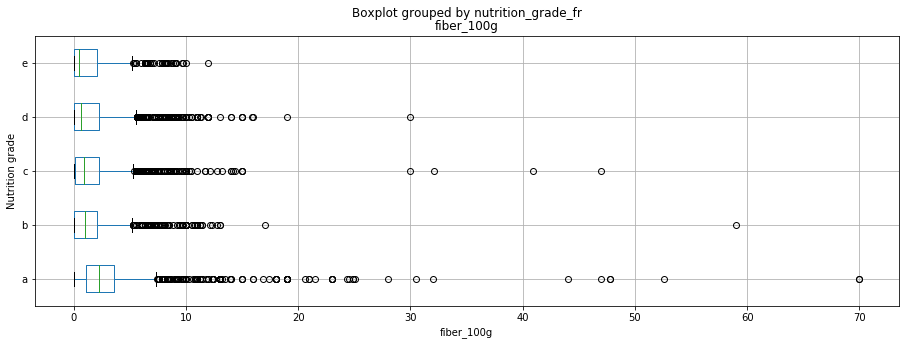

In [6]:
for food_column in ['energy_100g',
       'fat_100g', 'saturated-fat_100g', 'proteins_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g']:
    dataframe.boxplot(column=food_column, 
                  by='nutrition_grade_fr', 
                  vert=False, figsize=(15, 5)
                 )
    plt.xlabel(food_column)#"Mean income of the purchase town (in €)")
    plt.ylabel("Nutrition grade")
    #plt.title("Distribution of the sold food items with regard to the median income of the purchase town.")
    plt.show()

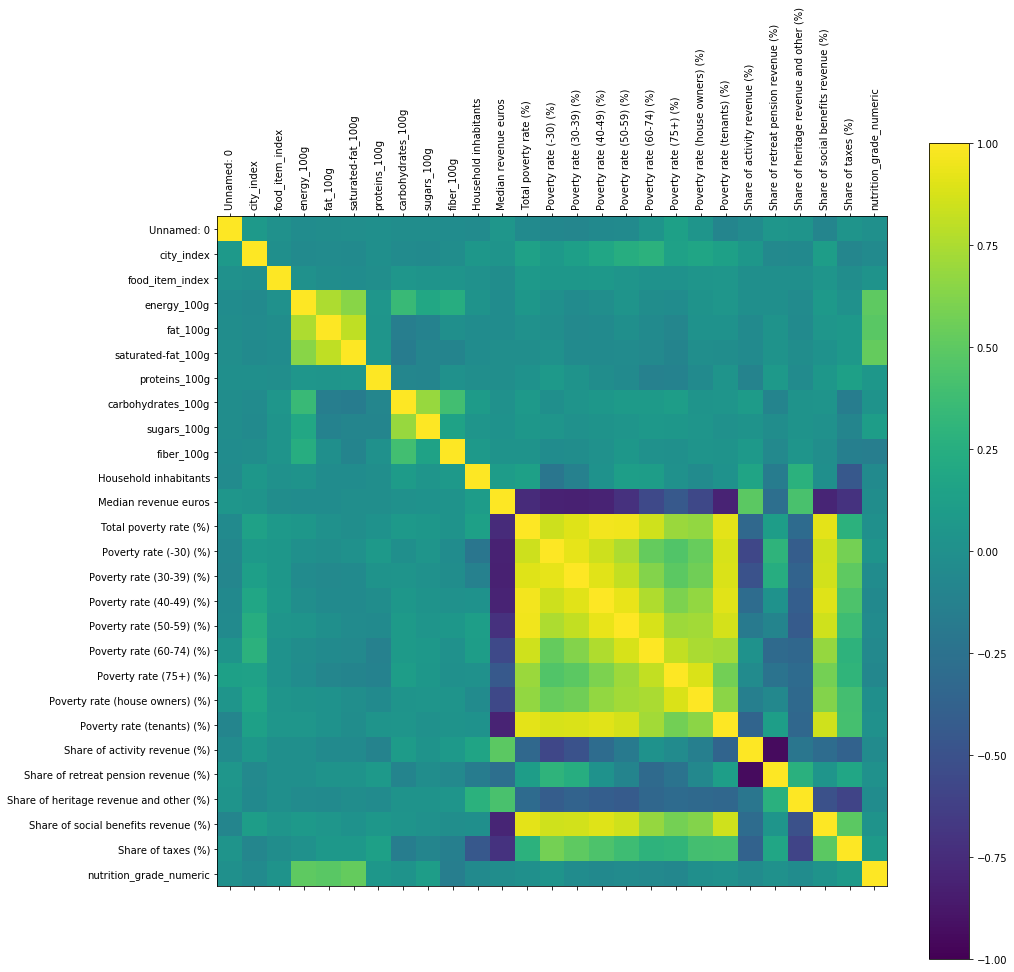

In [7]:
correlations = dataframe.corr()
names = list(correlations.columns)
# plot correlation matrix
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation='vertical')
plt.show()

We see that there is no correlation between the nutrition grade or any other food-related feature, and the income-related features.

There is however a small (~0.6) positive correlation between the nutrition grade and the amount of energy, fat, and saturated in a food item.

Le score est calculé par un système de points, le score le plus faible étant le meilleur.

- éléments défavorables au score : apport calorique pour 100 grammes, teneur en sucre, en graisses saturées et en sel.

- éléments favorables au score : teneur en fruits, légumes, légumineuses et oléagineux, teneur en fibres, et enfin teneur en protéines.

In [8]:
dataframe.head()

,Unnamed: 0,city_index,food_item_index,city_tag_from_food_item,code,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,...,Poverty rate (60-74) (%),Poverty rate (75+) (%),Poverty rate (house owners) (%),Poverty rate (tenants) (%),Share of activity revenue (%),Share of retreat pension revenue (%),Share of heritage revenue and other (%),Share of social benefits revenue (%),Share of taxes (%),nutrition_grade_numeric
0,0,30,359180,belley-ain-france,3307906000064,d,1243.0,24.0,17.0,19.0,...,16.949153,NaN,6.205567,29.609475,65.9,31.2,11.1,7.1,-15.3,4
1,1,30,359153,belley-ain-france,3307902060086,d,1402.0,30.0,19.0,15.0,...,16.949153,NaN,6.205567,29.609475,65.9,31.2,11.1,7.1,-15.3,4
2,2,30,359177,belley-ain-france,3307905810084,d,1435.0,31.0,21.0,15.0,...,16.949153,NaN,6.205567,29.609475,65.9,31.2,11.1,7.1,-15.3,4
3,3,30,359157,belley-ain-france,3307904400125,d,1238.0,24.0,18.0,19.0,...,16.949153,NaN,6.205567,29.609475,65.9,31.2,11.1,7.1,-15.3,4
4,4,30,359155,belley-ain-france,3307903690121,d,1435.0,31.0,21.0,15.0,...,16.949153,NaN,6.205567,29.609475,65.9,31.2,11.1,7.1,-15.3,4


In [9]:
nutri_score = ((dataframe['energy_100g'] / dataframe['energy_100g'].std()) 
+ (dataframe['fat_100g'] / dataframe['fat_100g'].std()) 
+ (dataframe['saturated-fat_100g'] / dataframe['saturated-fat_100g'].std())
+ (dataframe['sugars_100g'] / dataframe['sugars_100g'].std())) 
nutri_score = nutri_score.divide((dataframe['fiber_100g'] / dataframe['fiber_100g'].std()) +
                                 (dataframe['proteins_100g'] / dataframe['proteins_100g'].std()))
nutri_score = nutri_score.replace([np.inf, -np.inf], np.nan)

In [10]:
nutri_score_noNa = dataframe['energy_100g'].fillna(0) / dataframe['energy_100g'].fillna(0).std() 
+ dataframe['fat_100g'].fillna(0) / dataframe['fat_100g'].fillna(0).std()
+ dataframe['saturated-fat_100g'].fillna(0) / dataframe['saturated-fat_100g'].fillna(0).std()
+ dataframe['sugars_100g'].fillna(0) / dataframe['sugars_100g'].fillna(0).std()
nutri_score_noNa = nutri_score_noNa.replace([np.inf, -np.inf], np.nan)

In [12]:
pearson_coeff = dataframe['Median revenue euros'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and median revenue is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and median revenue is: 0.004


In [13]:
pearson_coeff = dataframe['Total poverty rate (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and total poverty rate is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and total poverty rate is: 0.010


In [14]:
pearson_coeff = dataframe['Poverty rate (-30) (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and poverty rate for people under 30 is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and poverty rate for people under 30 is: 0.011


In [15]:
pearson_coeff = dataframe['Poverty rate (30-39) (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and poverty rate for people between 30 and 39 is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and poverty rate for people between 30 and 39 is: 0.004


In [16]:
pearson_coeff = dataframe['Poverty rate (40-49) (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and poverty rate for people between 40 and 49 is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and poverty rate for people between 40 and 49 is: 0.010


In [17]:
pearson_coeff = dataframe['Poverty rate (50-59) (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and poverty rate for people between 50 and 59 is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and poverty rate for people between 50 and 59 is: 0.020


In [18]:
pearson_coeff = dataframe['Poverty rate (60-74) (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and poverty rate for people between 60 and 74 is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and poverty rate for people between 60 and 74 is: 0.013


In [19]:
pearson_coeff = dataframe['Poverty rate (75+) (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and poverty rate for people older than 75 is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and poverty rate for people older than 75 is: 0.013


In [20]:
pearson_coeff = dataframe['Share of social benefits revenue (%)'].corr(nutri_score)
print('The Pearson coefficient between nutrition score and the share of social benefits in the income is: {pearson:.3f}'
      .format(pearson=pearson_coeff))

The Pearson coefficient between nutrition score and the share of social benefits in the income is: 0.010


In [21]:
dataframe['nutri_score'] = nutri_score_noNa

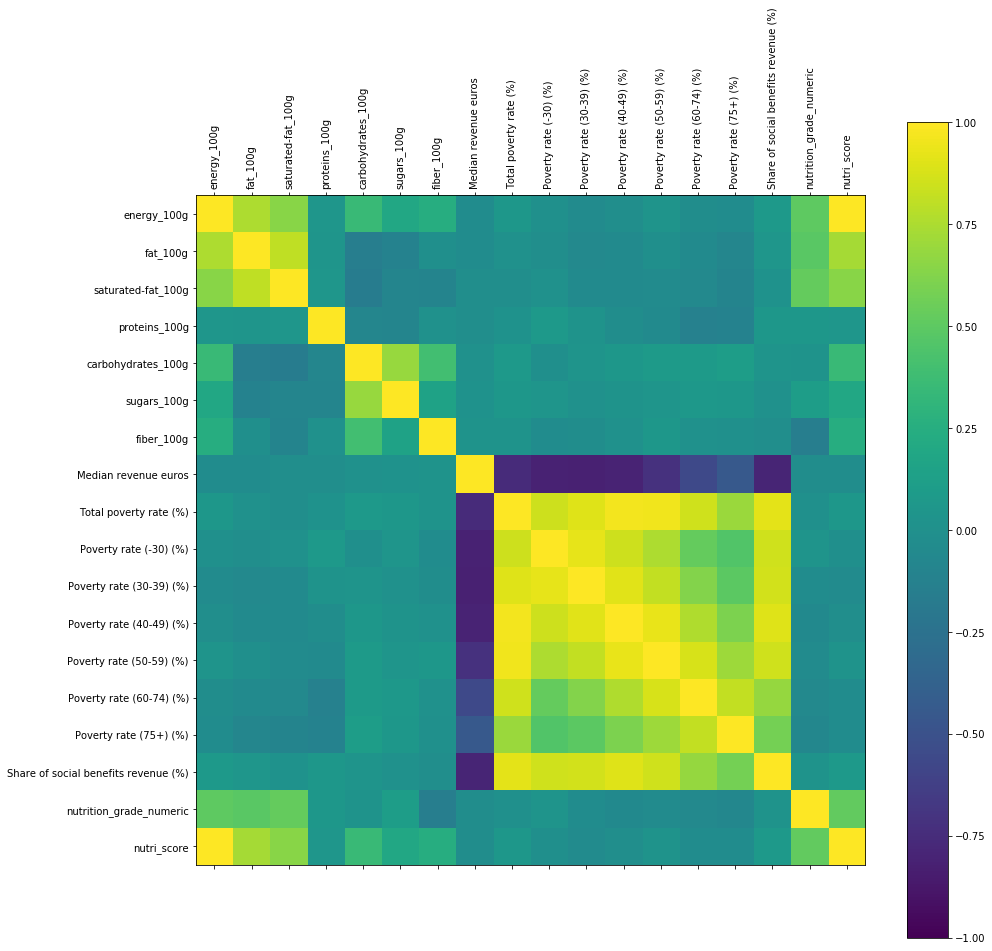

In [22]:
correlations_2 = dataframe[['energy_100g',
       'fat_100g', 'saturated-fat_100g', 'proteins_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'Median revenue euros', 'Total poverty rate (%)',
       'Poverty rate (-30) (%)', 'Poverty rate (30-39) (%)',
       'Poverty rate (40-49) (%)', 'Poverty rate (50-59) (%)',
       'Poverty rate (60-74) (%)', 'Poverty rate (75+) (%)',
        'Share of social benefits revenue (%)', 'nutrition_grade_numeric', 'nutri_score']].corr()
names = list(correlations_2.columns)
# plot correlation matrix
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_2, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation='vertical')
plt.show()

# Correlation between stores and quality of the products

In [26]:
store_dataframe = pd.read_csv('../data/processed/clean_food_and_stores.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
nutrition_store_df = store_dataframe[['store_name', 'nutrition_grade_numeric']]
nutrition_store_df = nutrition_store_df[nutrition_store_df['nutrition_grade_numeric'] > 0]
nutrition_per_store = nutrition_store_df.groupby('store_name').agg(['mean', 'count', 'median'])
nutrition_per_store.describe()

nutrition_grade_numeric                         
                         mean        count      median
count              439.000000   439.000000  439.000000
mean                 3.119361    54.943052    3.121868
std                  1.166083   278.506239    1.227752
min                  1.000000     1.000000    1.000000
25%                  2.000000     1.000000    2.000000
50%                  3.026316     2.000000    3.000000
75%                  4.000000     5.000000    4.000000
max                  5.000000  3456.000000    5.000000

In [28]:
nutrition_per_store.columns = ['_'.join(col).strip().strip('_') for col in nutrition_per_store.columns.values]

In [29]:
nutrition_per_store = nutrition_per_store[nutrition_per_store["nutrition_grade_numeric_count"] > 100]
nutrition_per_store.describe()

,nutrition_grade_numeric_mean,nutrition_grade_numeric_count,nutrition_grade_numeric_median
count,25.000000,25.000000,25.0
mean,3.124525,871.840000,3.2
std,0.253324,822.305837,0.5
min,2.526682,111.000000,2.0
25%,3.048739,270.000000,3.0
50%,3.110390,600.000000,3.0
75%,3.249794,1263.000000,3.0
max,3.593651,3456.000000,4.0


In [30]:
nutrition_per_store.reset_index()
nutrition_per_store

,nutrition_grade_numeric_mean,nutrition_grade_numeric_count,nutrition_grade_numeric_median
store_name,,,
aldi,3.095491,377,3.0
auchan,3.048739,1785,3.0
banque alimentaire,2.541219,279,2.0
carrefour,3.108507,3456,3.0
carrefour city,3.207447,188,3.0
carrefour market,3.082816,966,3.0
casino,2.894393,1070,3.0
cora,3.181536,1289,3.0
dia,3.425061,407,4.0


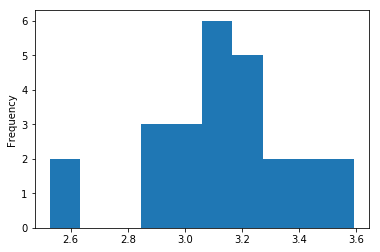

In [31]:
nutrition_per_store['nutrition_grade_numeric_mean'].plot.hist()

We see that there is no significant difference between the discounters and the main stores. Also, stores for which we have enough data have roughly the same mean and median.

# Visualization

In [32]:
import seaborn as sns
import folium
import json
import re
from IPython.core.display import display, HTML

In [37]:
map_df = pd.read_csv("../data/processed/clean_food_cities_arrond.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
df_revenue = map_df[['Arrondissement', 'Median revenue euros']].groupby('Arrondissement').median().fillna(0)

In [67]:
map_revenue = folium.Map(location=[46.9, 2.7], tiles='cartodbpositron', zoom_start=6)
map_revenue

In [68]:
# This doesn't work
# geojson: https://github.com/gregoiredavid/france-geojson
scale = np.linspace(0, np.max(dataframe['Median revenue euros']), 6)

map_revenue = folium.Map(location=[46.5, 2.3], tiles='cartodbpositron', zoom_start=6)
arr_borders = json.load(open("../data/processed/arrondissements.geojson"))

map_revenue.choropleth(geo_data=arr_borders, 
                   data=arr_borders, 
                   columns=['Arrondissement', 'Median revenue euros'],
                   key_on='feature.id',
                   legend_name='Percentage of UDC voters (%)',
                   threshold_scale=list(scale),
                   fill_color='OrRd',fill_opacity=0.7, line_opacity=0.2,)

map_revenue.save("../data/html/map_revenue.html")

FileNotFoundError: [Errno 2] No such file or directory: '../data/html/map_revenue.html'

In [ ]:
display(HTML("<a href='../data/html/map_udc.html' target='_blank'>Median revenue</a>"))